In [110]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
experiencia = pd.Series([1.1, 1.3, 1.5, 2.0, 2.2, 2.9,3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5])
experiencia
salario = pd.Series([39343.00,46205.00,37731.00,43525.00,39891.00,56642.00,60150.00,54445.00,64445.00,57189.00,63218.00,55794.00,56957.00,57081.00,61111.00,67938.00,66029.00,83088.00,81363.00,93940.00,91738.00,98273.00, 101302.00,113812.00,109431.00,105582.00,116969.00,112635.00,122391.00,121872.00])
salario
df = pd.DataFrame({'Experiencia': experiencia, 'Salario':salario})
df

,Experiencia,Salario
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [112]:
#Analisis de datos, analizar la cantidad de datos nulos
salario.isnull().sum()

0

In [113]:
experiencia.isnull().sum()

0

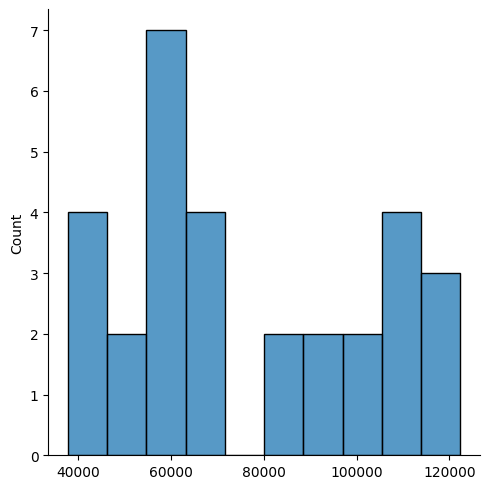

In [114]:
sns.displot(salario, bins=10)
plt.show()
#Tomamos todos los valores y los hemos distribuido entre 10
#Nos ayuda cuando tenemos muchos datos para saber que zona graficar

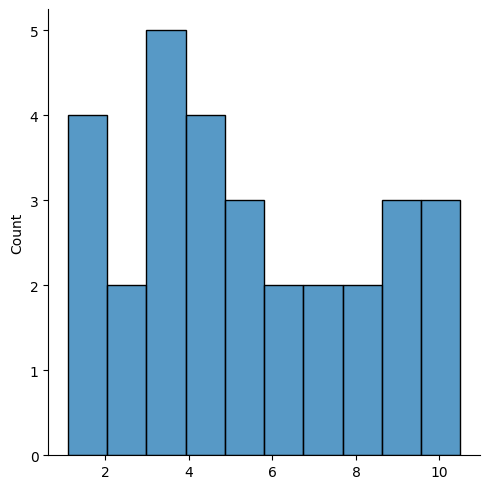

In [115]:
sns.displot(experiencia, bins=10)
plt.show()

<Axes: >

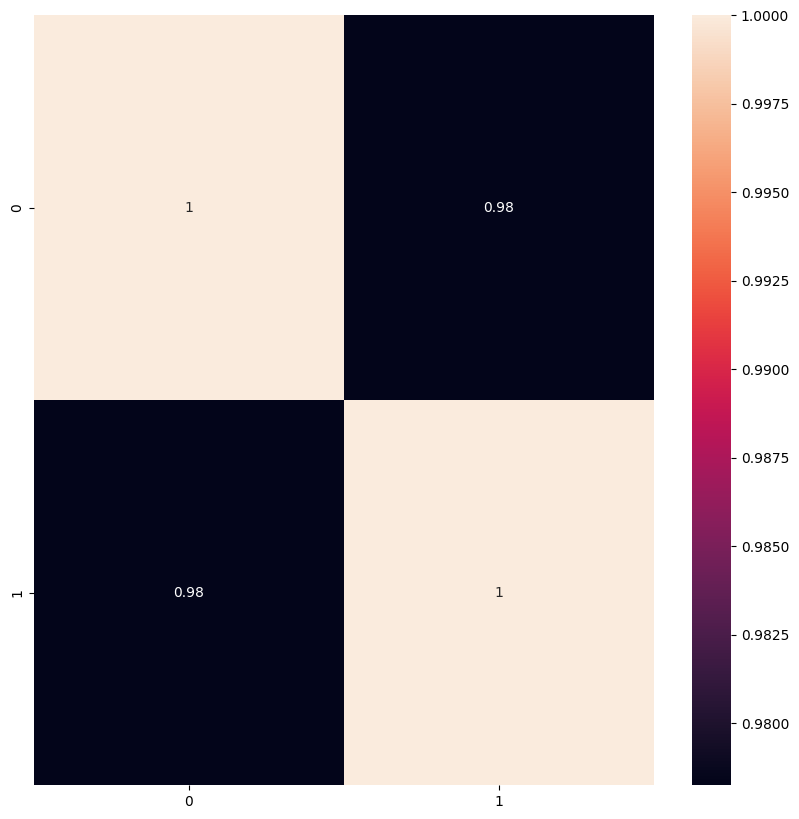

In [116]:
#Matriz de correlación
#viene a medir la relacion lineal de cada par de valores
#nos sirve para ver la fuerza y direccion de la relacion de dos variables
correlacion_matrix_salario_experiencia = np.corrcoef(salario, experiencia)
sns.heatmap(data=correlacion_matrix_salario_experiencia, annot=True)

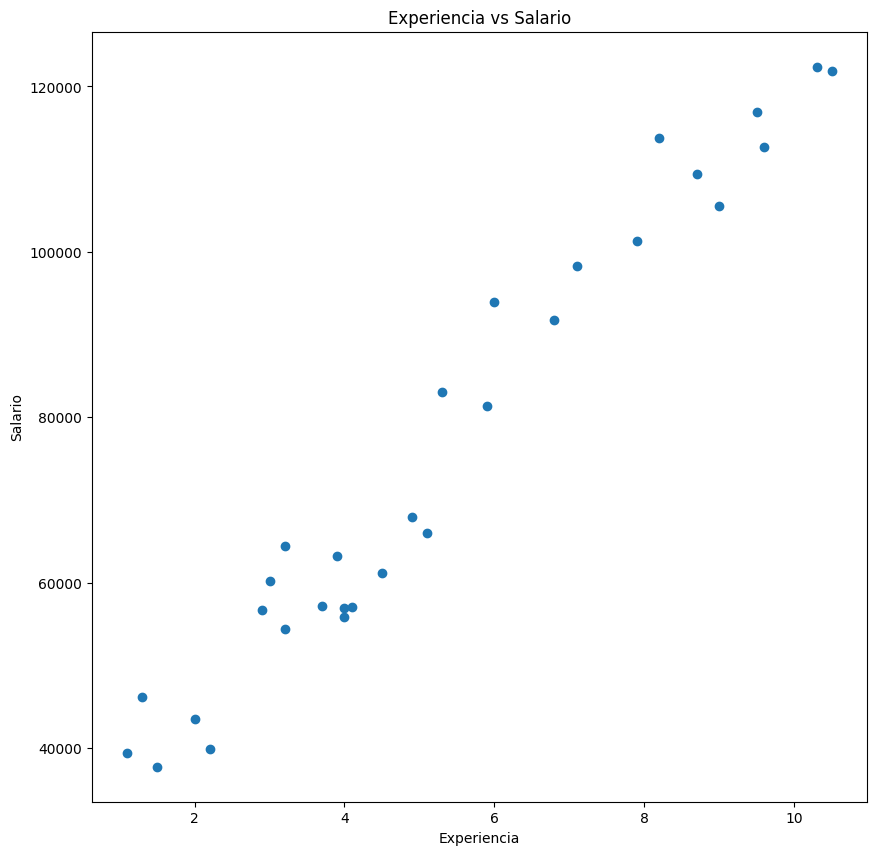

In [117]:
plt.scatter (experiencia, salario)
plt.title('Experiencia vs Salario')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

In [118]:
print('Maximo valor {}'.format(salario.max()))
print('Minimo valor {}'.format(salario.min()))
print('Mean valor {}'.format(salario.mean()))
print('Media valor {}'.format(salario.median()))
print('STD valor {}'.format(salario.std()))

Maximo valor 122391.0
Minimo valor 37731.0
Mean valor 76003.0
Media valor 65237.0
STD valor 27414.4297845823


In [119]:
#Dividir los datos entre Entrenamiento y Test
X_experiencia = experiencia
y_salario = salario
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_experiencia, y_salario, test_size=0.2, random_state=42)  #random state= seleccionar datos aleatorios 42 = patron del rango al ahora de trabajar en cualquier computadora
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24,)
(6,)
(24,)
(6,)


In [120]:
#Creación de modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train = X_train.values.reshape(-1, 1) #ya que el para entrenar al modelo X_train debe ser un array de 2D, le vamos a colocar una dimension de 1 adicional

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [121]:
#Evaluar el modelo
from sklearn.metrics import r2_score
X_test = X_test.values.reshape(-1,1) #ya que el para entrenar al modelo X_train debe ser un array de 2D, le vamos a colocar una dimension de 1 adicional

y_test_predict = lin_model.predict(X_test)
r2 = r2_score(y_test, y_test_predict) #coeficioente de determinación
print("El rendimiento del modelo para el conjunto de pruebas") 
print("------------------------------------------------------")
print('R2 Coeficiente de Determinación {}'.format(r2))

El rendimiento del modelo para el conjunto de pruebas
------------------------------------------------------
R2 Coeficiente de Determinación 0.9024461774180497


0.90 nos indica que el modelo es correcto y predice de manera adecuada

# y = mX + b


In [122]:
print('Coeficientes: \n', lin_model.coef_)
print('Término independiente: \n', lin_model.intercept_)

Coeficientes: 
 [9423.81532303]
Término independiente: 
 25321.583011776813


In [123]:
experiencia= experiencia.values.reshape(-1,1)
predicted_data_salario= lin_model.predict(experiencia) #predecir el modelo
predicted_data_salario[0:5]

array([35687.77986711, 37572.54293172, 39457.30599632, 44169.21365784,
       46053.97672244])

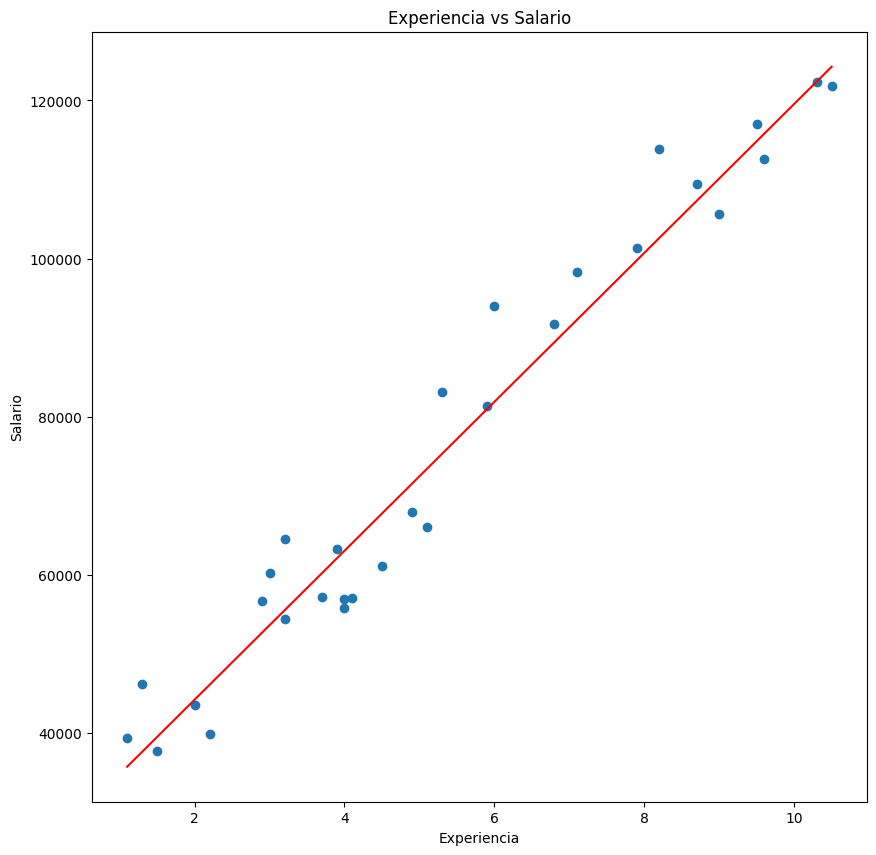

In [124]:
plt.scatter (experiencia, salario)
plt.plot(experiencia, predicted_data_salario, color='red')
plt.title('Experiencia vs Salario')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

In [125]:
df1= pd.DataFrame({'Real': salario, 'Predicción': predicted_data_salario})
df1

,Real,Predicción
0,39343.0,35687.779867
1,46205.0,37572.542932
2,37731.0,39457.305996
3,43525.0,44169.213658
4,39891.0,46053.976722
5,56642.0,52650.647449
6,60150.0,53593.028981
7,54445.0,55477.792045
8,64445.0,55477.792045
9,57189.0,60189.699707


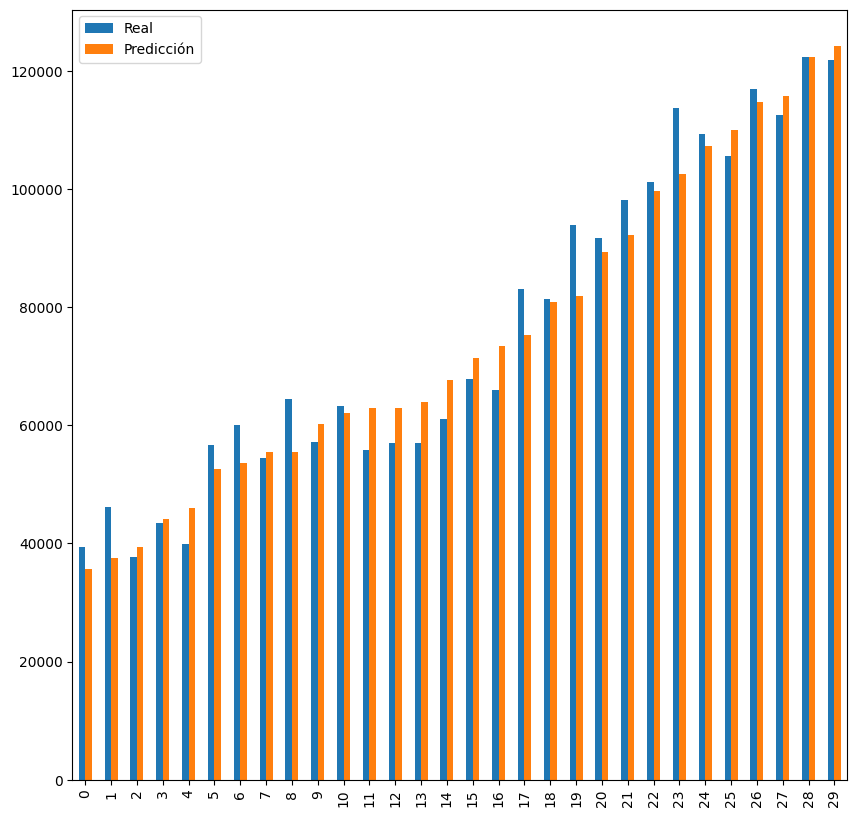

In [126]:
df1.head(30).plot(kind='bar')
plt.show()

# USANDO DATA DE FETCH CALIFORNIA HOUSING

In [127]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Cargar el conjunto de datos de vivienda de California
housing = fetch_california_housing() #DataSet -> Datos en matrices 

# Convertir Dataset a DataFrame de pandas
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target #variable Objetivo 

# Mostrar las primeras filas del DataFrame
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [128]:
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [129]:
df.shape

(20640, 9)

In [130]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

MedInc: Representa el ingreso mediano en el grupo de bloques (expresado en decenas de miles de dólares).
HouseAge: Indica la edad mediana de las casas en el grupo de bloques (en años).
AveRooms: Número promedio de habitaciones por hogar en el grupo de bloques.
AveBedrms: Número promedio de dormitorios por hogar en el grupo de bloques.
Population: Población total del grupo de bloques.
AveOccup: Número promedio de miembros del hogar en el grupo de bloques.
Latitude: Latitud del grupo de bloques.
Longitude: Longitud del grupo de bloques.
Variable Objetivo:
MedHouseVal: Valor mediano de las viviendas en el grupo de bloques, expresado en cientos de miles de dólares ($100,000).

In [131]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [132]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

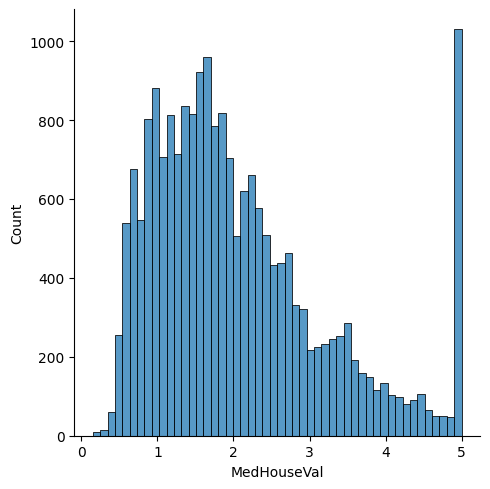

In [133]:
sns.displot(df['MedHouseVal'],bins=50)
plt.show()

In [134]:
#Matriz de correlación
correlation_matrix = df.corr().round(2)
correlation_matrix
#si es un valor cercano a cero poca relacion
#Un valor cercano a 1 mayor relación

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
MedHouseVal,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


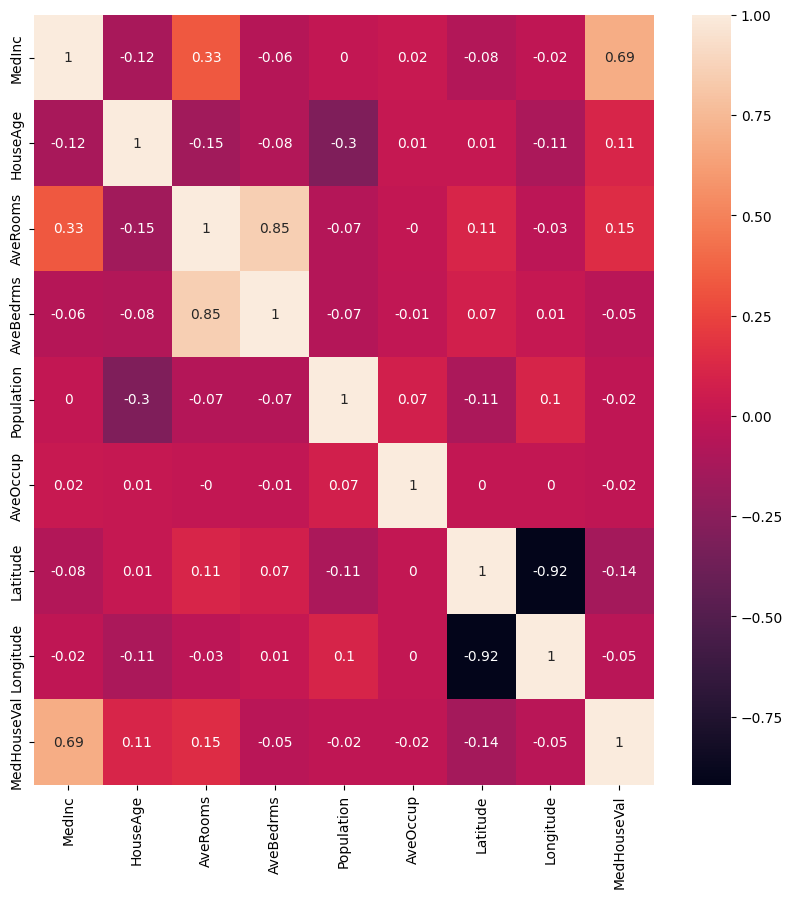

In [135]:
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

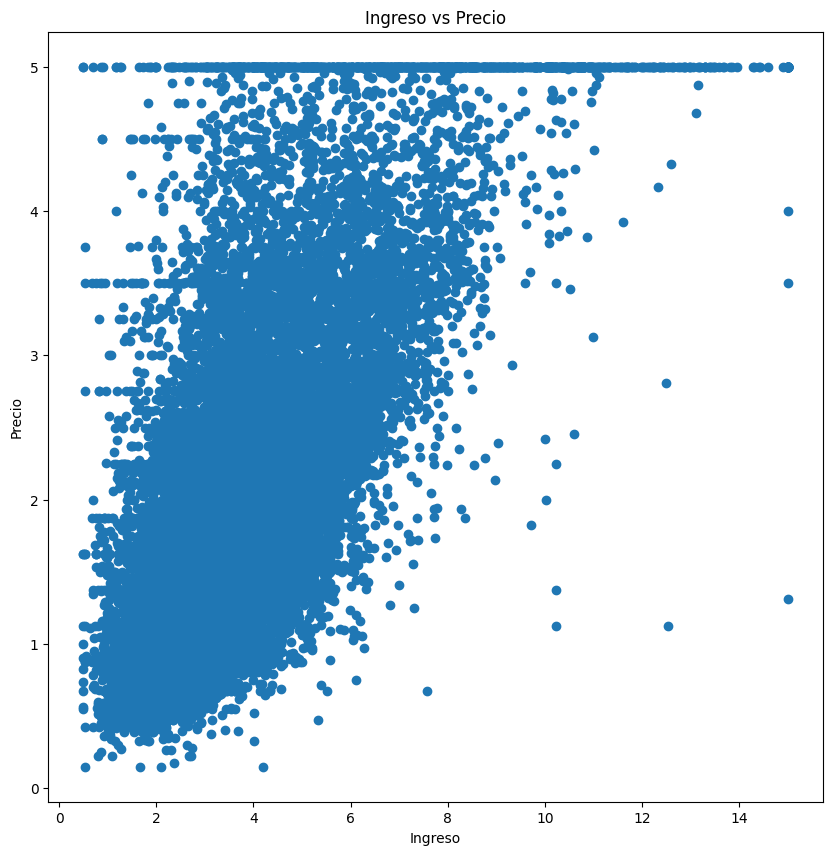

In [136]:
plt.scatter(df['MedInc'],df['MedHouseVal'])
plt.title('Ingreso vs Precio')
plt.xlabel('Ingreso')
plt.ylabel('Precio')
plt.show()

In [137]:
print('Maximo valor {}'.format(df['MedHouseVal'].max()))
print('Minimo valor {}'.format(df['MedHouseVal'].min()))
print('Mean valor {}'.format(df['MedHouseVal'].mean()))
print('Media valor {}'.format(df['MedHouseVal'].median()))
print('STD valor {}'.format(df['MedHouseVal'].std()))

Maximo valor 5.00001
Minimo valor 0.14999
Mean valor 2.068558169089147
Media valor 1.797
STD valor 1.1539561587441387


In [138]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_ingreso=df['MedInc']
y_valor= df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X_ingreso, y_valor, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512,)
(4128,)
(16512,)
(4128,)


In [139]:
#Creación de modelo
X_train = X_train.values.reshape(-1, 1)

lin_model_California  = LinearRegression()
lin_model_California.fit(X_train,y_train)

LinearRegression()

In [140]:
print('Coefficients: \n', lin_model_California.coef_)
print('Independent term: \n', lin_model_California.intercept_)

Coefficients: 
 [0.41933849]
Independent term: 
 0.44459729169078677


In [141]:
X_test= X_test.values.reshape(-1, 1)

# Hacer predicciones sobre el conjunto de prueba
y_pred = lin_model_California.predict(X_test)


In [142]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio (MSE): 0.7091157771765548
Coeficiente de Determinación (R^2): 0.45885918903846656


In [143]:

predicte_data_California= lin_model_California.predict(df[['MedInc']]) # df[['MedInc']] ser agrega una dimension adicional
predicte_data_California[0:5]

c:\Users\dg_su\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.93567412, 3.92569387, 3.48790448, 2.81096635, 2.05745701])

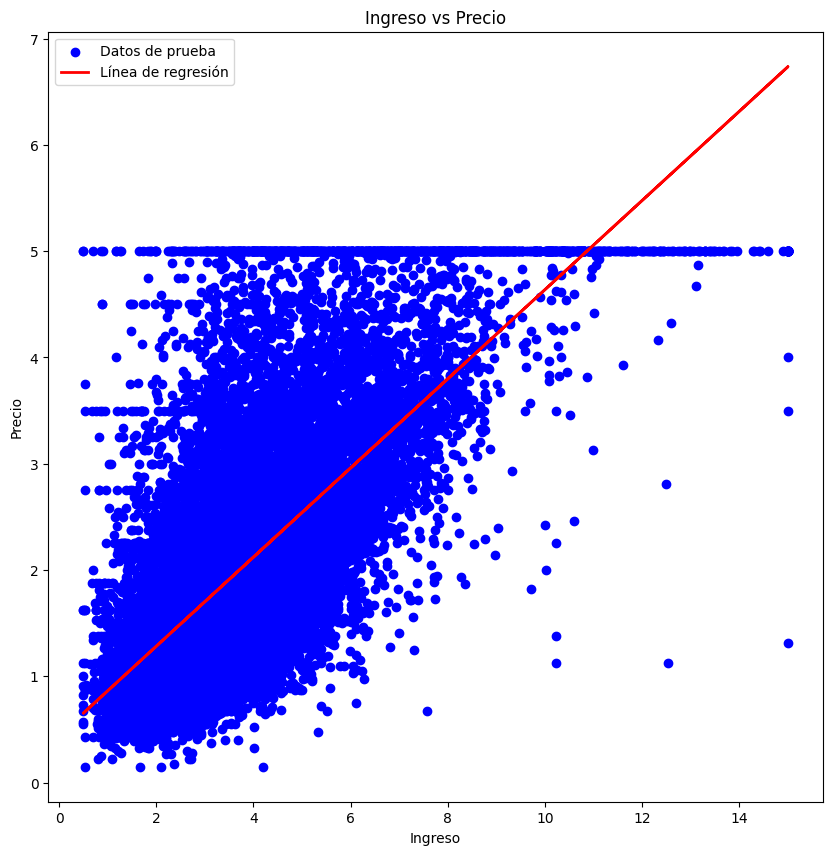

In [144]:
# Visualizar resultados
plt.scatter(df['MedInc'],df['MedHouseVal'], color='blue', label='Datos de prueba')
plt.plot(df['MedInc'],predicte_data_California, color='red', linewidth=2, label='Línea de regresión')
plt.title('Ingreso vs Precio')
plt.xlabel('Ingreso')
plt.ylabel('Precio')
plt.legend()
plt.show()

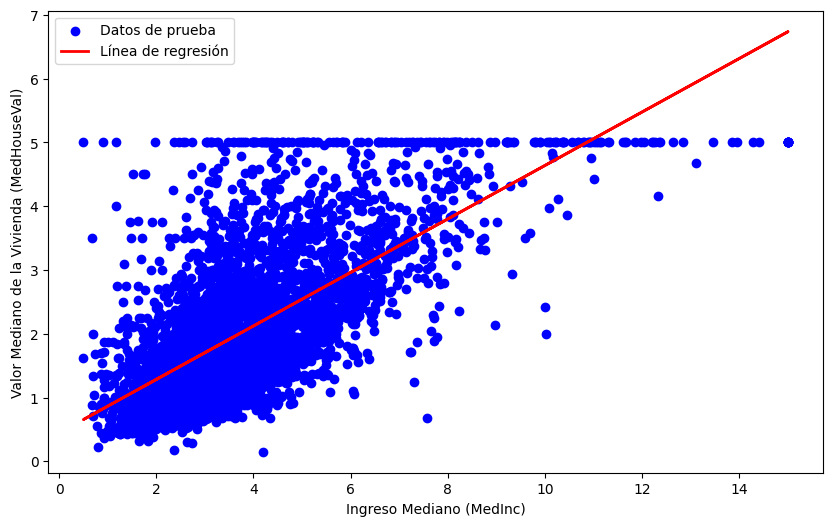

In [145]:
# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Ingreso Mediano (MedInc)')
plt.ylabel('Valor Mediano de la Vivienda (MedHouseVal)')
plt.legend()
plt.show()

In [146]:
df1= pd.DataFrame({'Real': df['MedHouseVal'], 'Predicción': predicte_data_California})
df1

,Real,Predicción
0,4.526,3.935674
1,3.585,3.925694
2,3.521,3.487904
3,3.413,2.810966
4,3.422,2.057457
...,...,...
20635,0.781,1.098891
20636,0.771,1.516762
20637,0.923,1.157473
20638,0.847,1.227586


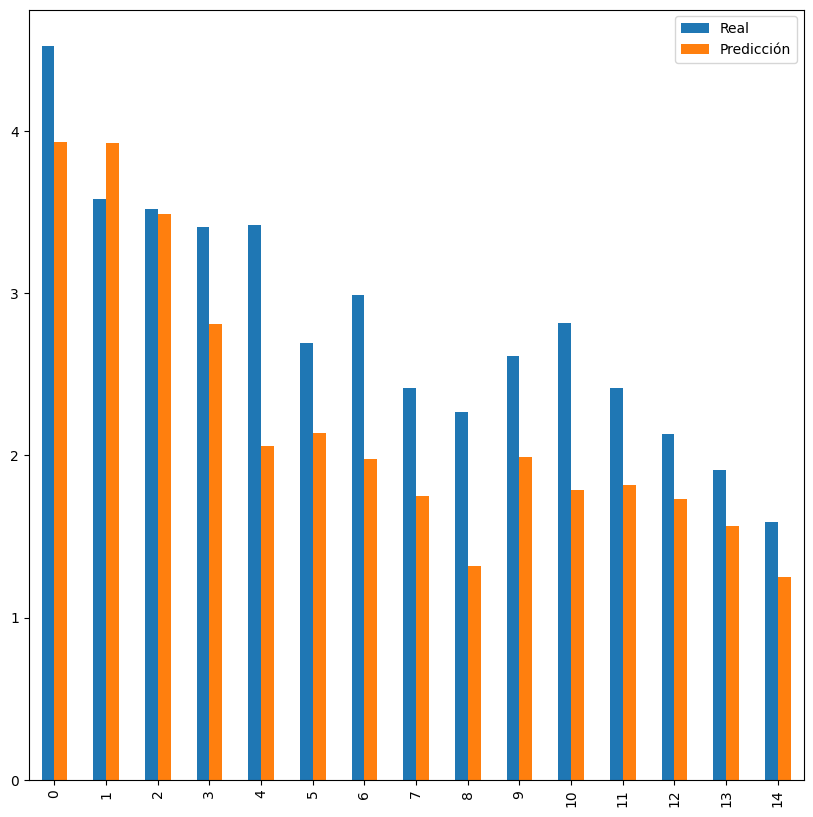

In [147]:
df1.head(15).plot(kind='bar')
plt.show()

# REGRESION LINEAL OTRO EJEMPLO

In [148]:
# Cargar el conjunto de datos y tomar una muestra
nombres_columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Ciencia de Datos con Python IEEE AESS\codigo\base de datos\housing.csv', header=None, delimiter=r"\s+", names=nombres_columnas)
print(df.head(5))


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


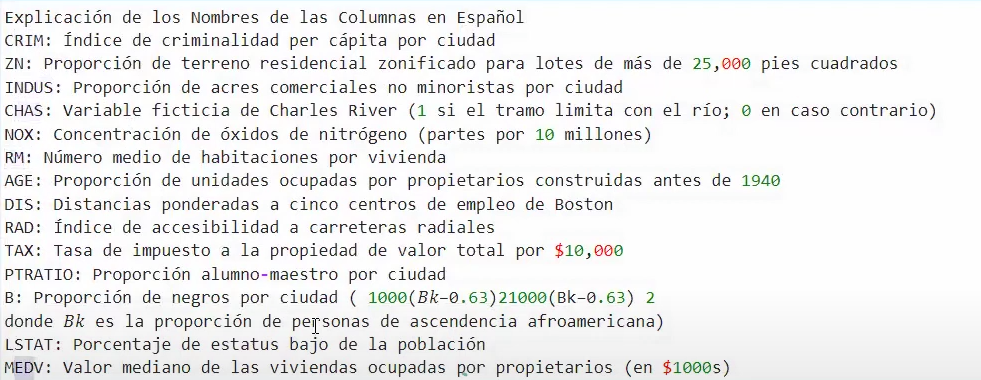

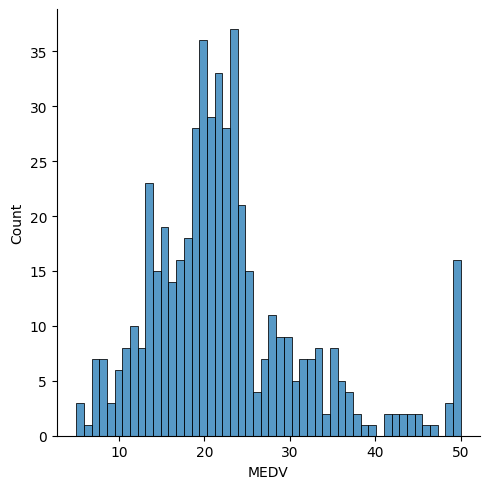

In [149]:
sns.displot(df['MEDV'],bins=50)
plt.show()

In [150]:
#Matriz de correlación
correlation_matrix = df.corr().round(2)
correlation_matrix
#si es un valor cercano a cero poca relacion
#Un valor cercano a 1 mayor relación

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


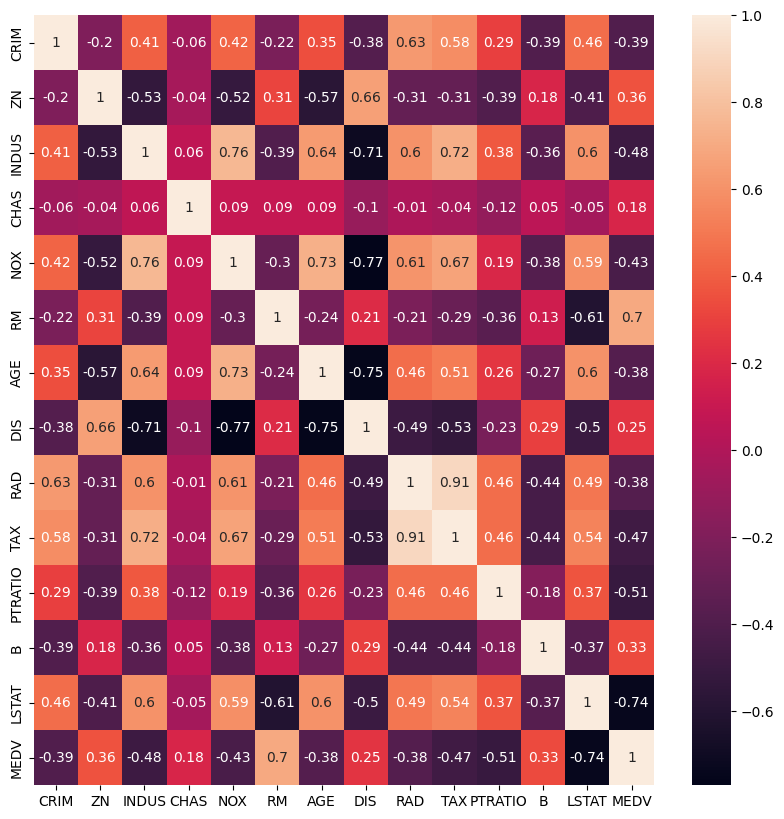

In [151]:
sns.heatmap(data=correlation_matrix, annot=True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

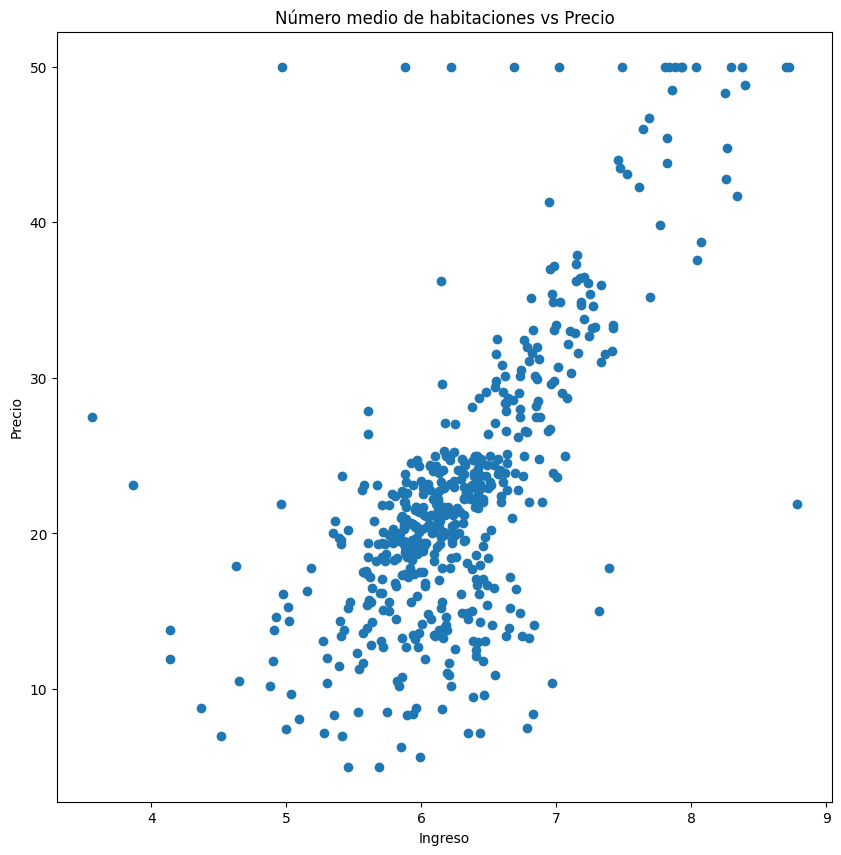

In [152]:
plt.scatter(df['RM'],df['MEDV'])
plt.title('Número medio de habitaciones vs Precio')
plt.xlabel('Ingreso')
plt.ylabel('Precio')
plt.show()

In [153]:
# Dividir los datos entre Entrenamiento y Test
X_habitaciones = df[['RM']]  # Corregido aquí para que sea un DataFrame
y_valor = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X_habitaciones, y_valor, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 1)
(102, 1)
(404,)
(102,)


In [154]:
# Creación de modelo
lin_model_hosting = LinearRegression()
lin_model_hosting.fit(X_train, y_train)
print('Coefficients: \n', lin_model_hosting.coef_)
print('Independent term: \n', lin_model_hosting.intercept_)

Coefficients: 
 [9.34830141]
Independent term: 
 -36.24631889813792


In [155]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = lin_model_hosting.predict(X_test)
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio (MSE): 46.144775347317264
Coeficiente de Determinación (R^2): 0.3707569232254778


In [156]:

# Hacer predicciones sobre todo el conjunto de datos
predicte_data_hosting = lin_model_hosting.predict(df[['RM']])
predicte_data_hosting[0:5]

array([25.21876285, 23.77912443, 30.92122671, 29.17309434, 30.56599125])

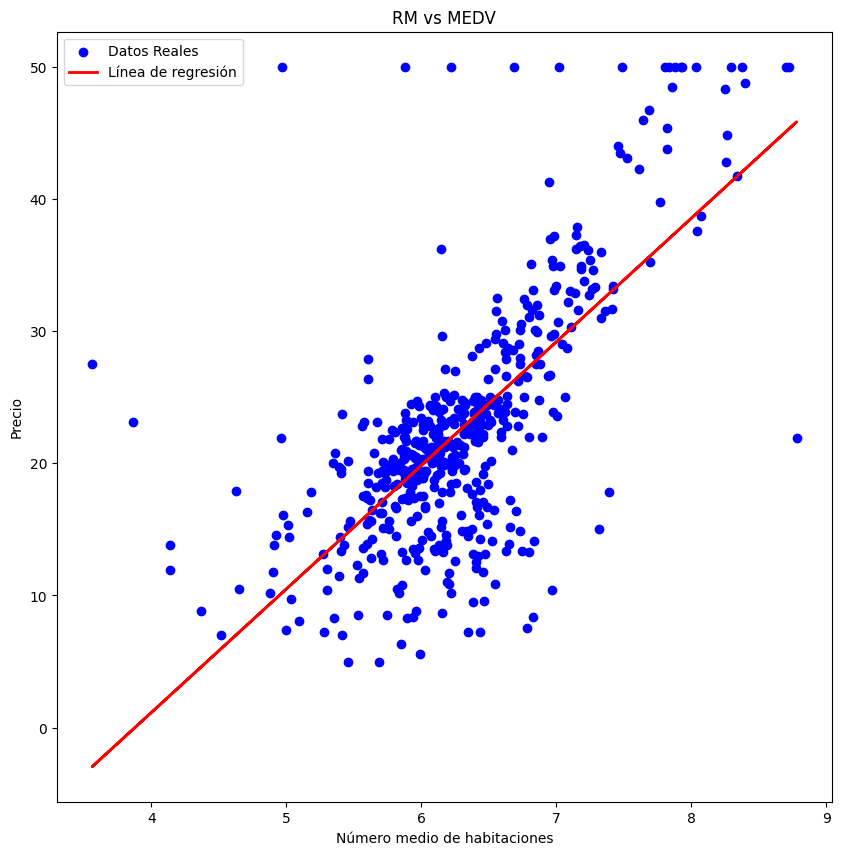

In [157]:
# Visualizar resultados
plt.scatter(df['RM'], df['MEDV'], color='blue', label='Datos Reales')
plt.plot(df['RM'], predicte_data_hosting, color='red', linewidth=2, label='Línea de regresión')
plt.title('RM vs MEDV')
plt.xlabel('Número medio de habitaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()